[<img style="float: right;" src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" /> ](https://colab.research.google.com/github/taehojo/deeplearning-for-everyone-3rd/blob/master/run_project/01_My_First_Deeplearning.ipynbb)

# 12장 다중 분류 문제 해결하기

## 5. 아이리스의 품종 예측 실행

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 입력
df = pd.read_csv('../data/iris3.csv')

In [3]:
#첫 5줄을 봅니다.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


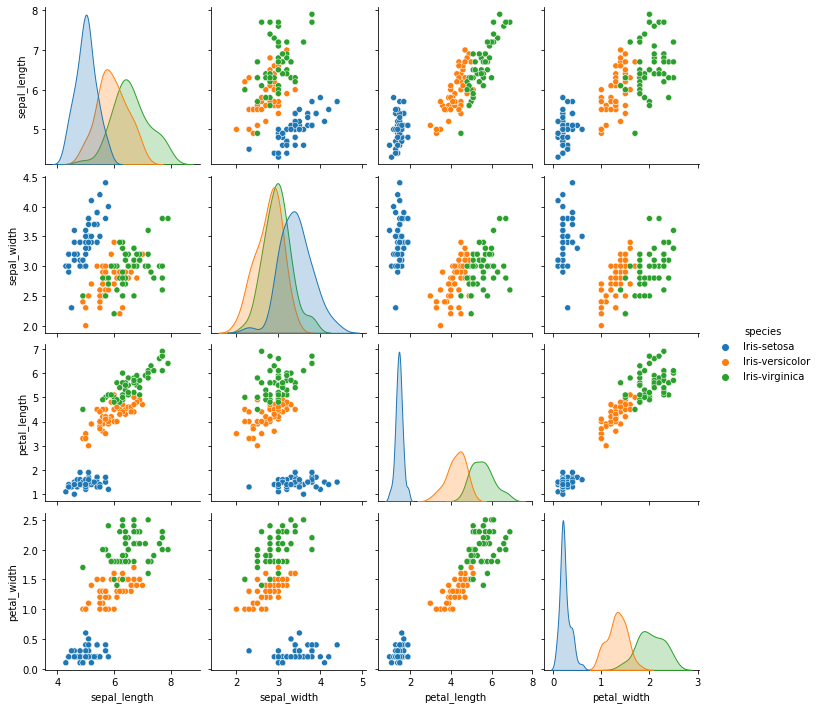

In [4]:
# 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');
plt.show()

In [5]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다. 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [6]:
# 원-핫 인코딩 처리를 합니다.
Y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(Y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


In [7]:
# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, Y, epochs=30, batch_size=5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 724us/step - loss: 1.3735 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 758us/step - loss: 1.0977 - accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 793us/step - loss: 0.9635 - accuracy: 0.6867
Epoch 4/30
30/30 [==============================] - 0s 690us/step - loss: 0.8942 - accur

## 